# Project Apollo

## Goal:
- Objective 1
- Objective 2

# Imports

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# import wrangle as w
# import explore as e
# import model as m
# import evaluate as ev

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr, f_oneway, ttest_ind, shapiro, levene

np.random.seed(123)

# Acquire
- Data acquired from _____ (e.g. [data.world](https://data.world/food/wine_quality) )
- It contained xx rows and xx columns before cleaning
- Each row represents ____
- Each column represents ____

# Prepare
- Removed ...
- Renamed ...
- Checked for nulls ...
- Checked that column data types were appropriate ...
- Outliers ?
- Added target column?
- Added additional features?
- Encoded categorical variables
- Split data into train, validate, and test (60/20/20), stratifying ...
- Scaled continuous variables


# Data Dictionary

| Feature | Type | Definition |
|:--------|:-----|:-----------|
|feature_1 (target)|integer|definition 1|

In [2]:
## acquireing and preparing data for exploration
df = pd.read_csv('ford_adjusted_entire_df.csv')

In [3]:
def split_data(df):
    '''
    Take in a DataFrame and perform a train-test split with a 70/30 ratio.
    Return train and test DataFrames.
    '''
    train, test = train_test_split(df, test_size=0.25, random_state=123)
    return train, test


In [4]:
## splitting data in to train, validate, and test
train, test = split_data(df)

# A brief look at the data

In [5]:
train.head()

,adjusted_revenue_B,year,quarter,population,median_house_income,federal_fund_rate,unemp_rate,misery_index,home_ownership_rate,government_spending,...,brent_oil,case_shiller_index,number_of_disaster,consumer_confidence_index,business_confidence_index,c_e_s_housing,c_e_s_health,c_e_s_entertainment,ease_of_doing_business,wars_started
1,45.232250,2022.0,3.0,333.640000,78595.000000,2.56,3.5,11.71485,66.0,6063.491000,...,90.608182,893.875,283.0,96.831203,99.187750,23454.479412,5644.799617,3322.633766,7.0,5.0
24,48.994948,2016.0,4.0,323.910000,81945.768813,0.12,4.7,6.75080,63.7,5136.899546,...,67.643004,562.116,190.0,101.364367,100.709533,24444.689486,6058.309686,3937.655423,7.0,7.0
65,60.931084,2006.0,3.0,298.905385,94351.777970,5.25,4.5,6.51207,69.0,4060.391953,...,91.466517,550.945,118.0,100.733733,99.416173,23940.659083,4046.184958,3477.144485,3.0,8.0
45,45.859909,2011.0,3.0,311.890000,79049.728387,0.08,9.0,12.81262,66.3,4949.873749,...,146.465598,411.781,104.0,97.488217,99.716470,21981.078078,4333.947014,3364.597561,5.0,10.0
60,61.856846,2007.0,4.0,302.285879,91520.565817,4.24,5.0,9.10881,67.8,4227.750415,...,129.328909,514.725,609.0,98.277647,99.037393,24177.227104,4205.472433,4006.221219,3.0,8.0


## A summary of the data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 66
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adjusted_revenue_B         60 non-null     float64
 1   year                       60 non-null     float64
 2   quarter                    60 non-null     float64
 3   population                 60 non-null     float64
 4   median_house_income        60 non-null     float64
 5   federal_fund_rate          60 non-null     float64
 6   unemp_rate                 60 non-null     float64
 7   misery_index               60 non-null     float64
 8   home_ownership_rate        60 non-null     float64
 9   government_spending        60 non-null     float64
 10  gdp_deflated               60 non-null     float64
 11  p_election                 60 non-null     float64
 12  midterm_election           60 non-null     float64
 13  violent_crime_rate         60 non-null     float64
 

In [7]:
##### to display all columns (df.head())
pd.set_option('display.max_columns', None)

In [8]:
train.describe()

,adjusted_revenue_B,year,quarter,population,median_house_income,federal_fund_rate,unemp_rate,misery_index,home_ownership_rate,government_spending,gdp_deflated,p_election,midterm_election,violent_crime_rate,cpi_all_items_avg,avg_temperature,avg_precipitation,palmer_drought_index,eci,dow,s_and_p,gas_perc_change,prime,gini,Man_new_order,hdi,construction_res,cli,auto_loan,velocity_of_money,loans_and_leases,wti,soy,brent_oil,case_shiller_index,number_of_disaster,consumer_confidence_index,business_confidence_index,c_e_s_housing,c_e_s_health,c_e_s_entertainment,ease_of_doing_business,wars_started
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,48.464952,2013.266667,2.500000,315.837954,84394.242474,1.226667,5.926667,8.444610,65.968333,5154.251177,102.886300,0.216667,0.316667,409.228333,234.115033,54.088667,2.704333,-0.111833,121.596667,22003.931145,3109.400245,0.011617,4.402833,40.761667,45776.783333,0.914483,6.247391e+05,99.845017,5.632333,1.607433,7.801667,87.997817,495.813598,93.394252,557.239117,554.65000,99.533695,100.065204,23349.923147,5062.515439,3573.243167,5.016667,6.300000
std,9.538493,5.535300,1.112335,12.523450,7044.141252,1.589650,2.073960,2.244368,1.802681,1165.572010,11.009633,0.415450,0.469102,37.055387,26.970896,15.636766,0.484048,2.564163,16.257879,7204.115530,833.903376,0.439336,1.543373,0.657188,9346.885496,0.009495,2.109297e+05,1.298129,1.153620,0.259863,9.536717,27.331245,121.806645,30.931914,131.167693,931.03414,1.538382,1.159709,951.665806,794.204889,201.079739,1.882044,2.141598
min,22.924865,2003.000000,1.000000,291.468297,76545.961677,0.080000,3.500000,5.216620,62.900000,3755.708609,83.306000,0.000000,0.000000,362.100000,184.300000,29.640000,1.590000,-5.270000,95.200000,10617.267381,1553.501257,-2.007000,3.250000,39.400000,21440.000000,0.895000,3.336163e+05,95.326237,4.000000,1.132000,-25.600000,33.715768,291.552077,39.036174,411.781000,44.00000,96.364630,96.061243,21659.658939,4023.084739,3154.881527,2.000000,2.000000
25%,43.917912,2009.000000,2.000000,306.050000,79393.132797,0.135000,4.375000,6.443165,64.400000,4754.893057,95.053250,0.000000,0.000000,383.200000,215.885000,39.875000,2.347500,-1.702500,110.025000,16320.681344,2509.303195,-0.173500,3.250000,40.525000,40388.000000,0.906000,4.241334e+05,99.283914,4.727500,1.448000,5.800000,66.644671,397.838720,71.241697,456.158250,148.00000,98.416089,99.475855,22533.820322,4300.928916,3413.679657,3.000000,5.000000
50%,46.615955,2013.500000,2.000000,317.310000,81910.226710,0.300000,5.100000,8.225695,65.500000,5056.984276,102.728500,0.000000,0.000000,396.100000,234.158000,64.255000,2.660000,-0.210000,119.250000,20813.309497,3018.969691,0.071000,3.555000,40.900000,45719.000000,0.917000,6.267363e+05,100.089207,5.290000,1.564000,9.000000,83.729353,470.078064,87.743732,529.606500,289.50000,99.707123,100.126563,23497.005819,5345.828556,3576.600959,5.000000,7.000000
75%,50.181252,2018.000000,3.250000,326.650000,87049.816561,1.842500,7.500000,10.004613,67.425000,5267.554352,110.350750,0.000000,1.000000,431.900000,251.422000,68.585000,2.972500,1.422500,133.075000,28608.040730,3666.326734,0.261250,5.060000,41.250000,53254.750000,0.921000,8.229805e+05,100.693847,6.610000,1.764250,13.025000,112.372936,601.525461,118.921475,612.513750,564.75000,100.982825,100.919983,24088.863641,5863.498614,3718.589943,7.000000,8.000000
max,73.110722,2022.000000,4.000000,334.110000,103016.371872,5.260000,11.000000,12.812620,69.200000,10242.661630,129.508000,1.000000,1.000000,479.300000,296.808000,72.590000,4.060000,5.470000,157.600000,37691.467626,5128.620938,0.808000,8.250000,41.500000,61080.000000,0.93

# Explore

## Question 0 (e.g. What is the distribution of the target?)
- NOTE: this question is more of a look at the data, not a stats test question

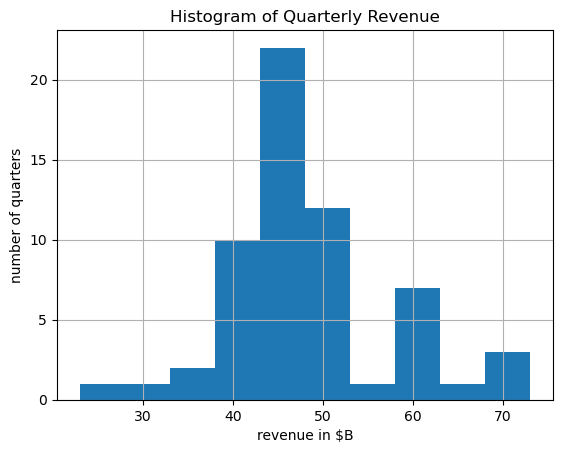

In [9]:
# Example: # get a boxplot and histplot of total_revenue_B of train
train.adjusted_revenue_B.hist()
plt.title('Histogram of Quarterly Revenue')
plt.ylabel('number of quarters')
plt.xlabel('revenue in $B')
plt.show()

## Test to see if total_revenue_B (target) and features are normally distributed with shapiro test
- $H_0$: The distribution of total_revenue_B is normal
- $H_a$: The distribution is NOT normal
- $\alpha$ = .05

In [11]:
#test all columns for normality.  
for col in train.columns:
    stat, p = shapiro(train[col])
    # if p <= .05:
    #     print(f'{col} column is NOT normally distributed.')
    if p > .05:
        print(f'{col} column IS normally distributed.')

gdp_deflated column IS normally distributed.
cpi_all_items_avg column IS normally distributed.
avg_precipitation column IS normally distributed.
palmer_drought_index column IS normally distributed.
eci column IS normally distributed.
s_and_p column IS normally distributed.
wti column IS normally distributed.
c_e_s_entertainment column IS normally distributed.


In [149]:
env_cols = ['avg_temperature', 'avg_precipitation', 'palmer_drought_index', 'number_of_disasters']

## Question 1 (e.g. Is avg_temperature associated with total_revenue_B?)

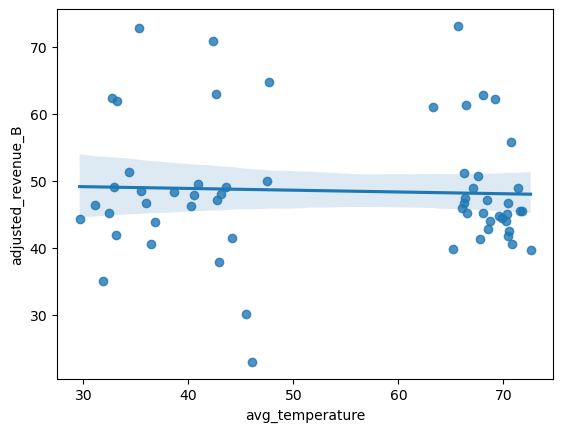

In [12]:
# Visualize Example: # get a regplot of avg_temperature vs total_revenue_B on train
sns.regplot(data=train, x='avg_temperature', y='adjusted_revenue_B')
plt.show()

### Analyze avg_temperature vs total_revenue_B with stats
- $H_0$: There is NO relationship between avg_temperature and total_revenue_B
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Utilize spearmanr - we are comparing continuous variables, not normally distributed

In [13]:
# get the stats from a spearmanr test on avg_temperature vs target
stat, p = spearmanr(train.adjusted_revenue_B, train.avg_temperature)
stat, p

(-0.1589886079466519, 0.2249961637176108)

### Summarize
- p is > $\alpha$, so we can NOT reject the $H_0$ which suggests there is NOT a relationship between avg_temperature and total_revenue_B. Additionaly the statistic is close to zero suggesting there is no correlation. Note: avg_temperature may affect other blue chip companies more (i.e. Starbucks) than Ford. However, for this project we intend to drop avg_temperature.

## Question 2 (e.g. Is avg_precipitation associated with total_revenue_B?)

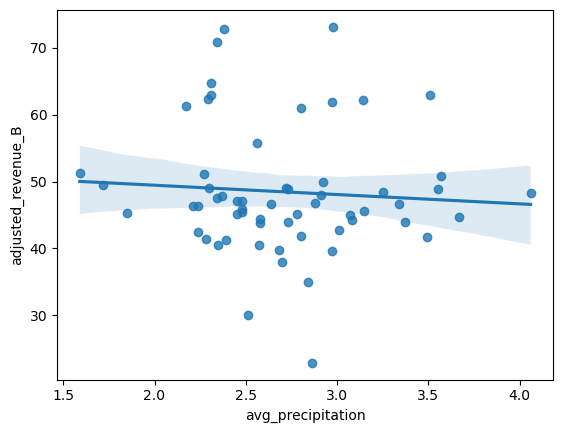

In [14]:
# Visualize Example: # get a regplot of avg_precipitation vs total_revenue_B on train
sns.regplot(data=train, x='avg_precipitation', y='adjusted_revenue_B')
plt.show()

### Analyze avg_precipitation vs total_revenue_B with stats
- $H_0$: There is NO relationship between avg_precipitation and total_revenue_B
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Utilize spearmanr - we are comparing continuous variables, where at least 1 (target) not normally distributed

In [15]:
# get the stats from a pearsonr test on avg_precipitation vs target
stat, p = spearmanr(train.adjusted_revenue_B, train.avg_precipitation)
stat, p

(-0.11199422121003809, 0.39424772238449635)

### Summarize
- p is > $\alpha$, so we can NOT reject the $H_0$ which suggests there is NOT a relationship between avg_precipitation and total_revenue_B. Since the visual shows a mild correlation and the statistic is -.20 (i.e. a very mild negative correlation), recommend reject

## Question 3 (e.g. Is palmer_drought_index associated with total_revenue_B?)

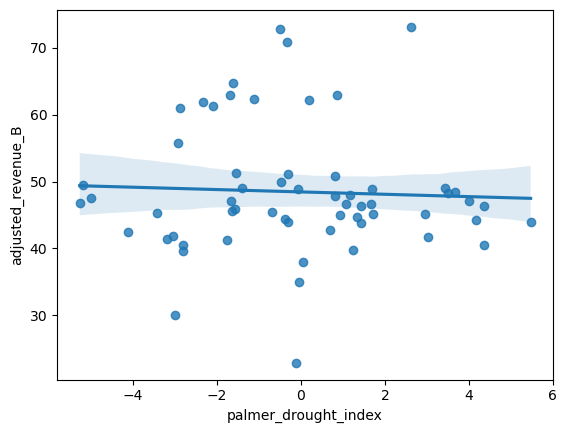

In [16]:
# Visualize: get a regplot of palmer_drought_index vs total_revenue_B on train
sns.regplot(data=train, x='palmer_drought_index', y='adjusted_revenue_B')
plt.show()

### Analyze palmer_drought_index vs total_revenue_B with stats
- $H_0$: There is NO relationship between palmer_drought_index and total_revenue_B
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Utilize spearmanr - we are comparing continuous variables, where at least 1 (target) not normally distributed

In [17]:
# get the stats from a pearsonr test on palmer_drought_index vs target
stat, p = spearmanr(train.adjusted_revenue_B, train.palmer_drought_index)
stat, p

(-0.0602945262572937, 0.6472172153160007)

### Summarize
- p is > $\alpha$, so we can NOT reject the $H_0$ which suggests there is NOT a relationship between palmer_drought_index and total_revenue_B. Since the visual shows a mild correlation and the statistic is -.22 (i.e. a fairly mild negative correlation), this could be due to our small sample size. probably reject

## Question 4 (e.g. Is number_of_disaster associated with total_revenue_B?)

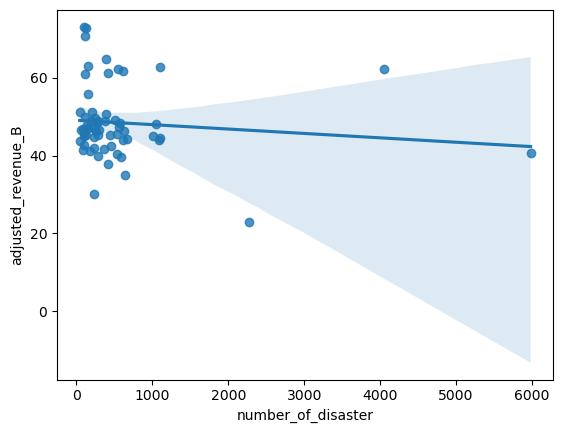

In [18]:
# Visualize: get a regplot of number_of_disaster vs total_revenue_B on train
sns.regplot(data=train, x='number_of_disaster', y='adjusted_revenue_B')
plt.show()

### Analyze number_of_disaster vs total_revenue_B with stats
- $H_0$: There is NO relationship between number_of_disaster and total_revenue_B
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Utilize spearmanr - we are comparing continuous variables, where at least 1 (target) not normally distributed

In [19]:
# get the stats from a spearmanr test on number_of_disaster vs target
stat, p = spearmanr(train.adjusted_revenue_B, train.number_of_disaster)
stat, p

(-0.1957793245441028, 0.1338350570826483)

In [20]:
# get the stats from a spearmanr test on number_of_disaster vs target (taking out the outliers)
stat, p = spearmanr(train[train.number_of_disaster<2000].adjusted_revenue_B, train[train.number_of_disaster<2000].number_of_disaster)
stat, p

(-0.1664533065636378, 0.2158985495348987)

### Summarize
- p is > $\alpha$, so we can NOT reject the $H_0$ which suggests there is NOT a relationship between number_of_disaster and total_revenue_B. The visual shows a mild correlation , but the statistic is -.22 (i.e. a fairly mild negative correlation), recommend reject

## Question 5 (e.g. Is total_flights associated with total_revenue_B?)
## NOTE: total_flights eliminated previously; it is no longer in the dataset

In [123]:
# Visualize: get a regplot of total_flights vs total_revenue_B on train
# sns.regplot(data=train, x='total_flights', y='total_revenue_B')
# plt.show()

### Analyze total_flights vs total_revenue_B with stats
- $H_0$: There is NO relationship between total_flights and total_revenue_B
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Utilize spearmanr - we are comparing continuous variables, normally distributed

In [134]:
# # get the stats from a spearmanr test on total_flights vs target
# stat, p = spearmanr(train.total_revenue_B, train.total_flights)
# stat, p

### Summarize
- p is > $\alpha$, so we can NOT reject the $H_0$ which suggests there is NOT a relationship between total_flights and total_revenue_B. The visual also shows no correlation and the statistic is near 0. We will reject this feature and not move ahead to modeling with it.

# What about the variable 'quarter'? Are there any associations?

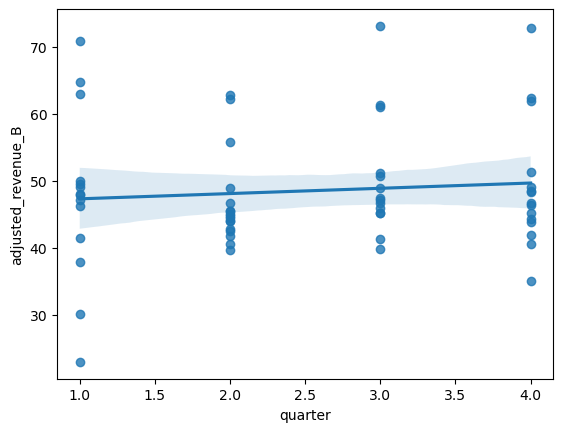

In [21]:
# Visualize: get a regplot of total_flights vs total_revenue_B on train
sns.regplot(data=train, x='quarter', y='adjusted_revenue_B')
plt.show()

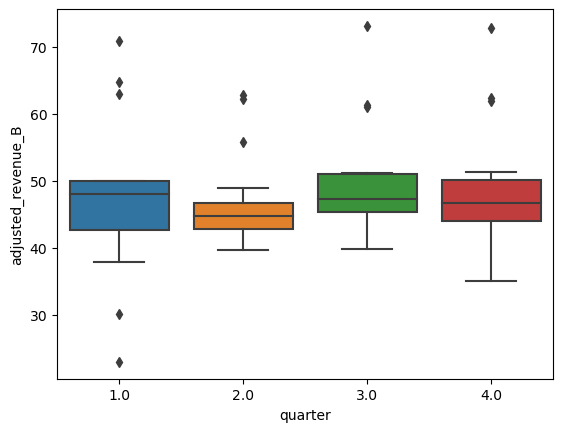

In [22]:
# Visualize 
sns.boxplot(x=train.quarter, y=train.adjusted_revenue_B)
plt.show()

In [23]:
# get the stats from a spearmanr test on number_of_disaster vs target
stat, p = spearmanr(train.adjusted_revenue_B, train.quarter)
stat, p

(0.04901193791768645, 0.7099805165778333)

# Summarize total_revenue_B vs quarter:
- p > alpha: reject H0 which suggests there is NOT a relation between quarter and total_revenue_B
- maybe there will be a cluster with quarter and one or two other variables that may be helpful?

# Foray into clustering

## Do either election variables cluster with anything (consumer_confidence, consumer_expenditure)

In [136]:
train.columns

Index(['total_revenue_B', 'year', 'quarter', 'population',
       'median_house_income', 'federal_fund_rate', 'unemp_rate',
       'misery_index', 'home_ownership_rate', 'government_spending',
       'gdp_deflated', 'p_election', 'midterm_election', 'violent_crime_rate',
       'cpi_all_items_avg', 'avg_temperature', 'avg_precipitation',
       'palmer_drought_index', 'eci', 'dow', 's_and_p', 'gas_perc_change',
       'prime', 'gini', 'Man_new_order', 'hdi', 'construction_res', 'cli',
       'auto_loan', 'velocity_of_money', 'loans_and_leases', 'wti', 'soy',
       'case_shiller_index', 'number_of_disaster', 'consumer_confidence_index',
       'business_confidence_index', 'c_e_s_housing', 'c_e_s_health',
       'c_e_s_entertainment', 'ease_of_doing_business', 'wars_started'],
      dtype='object')

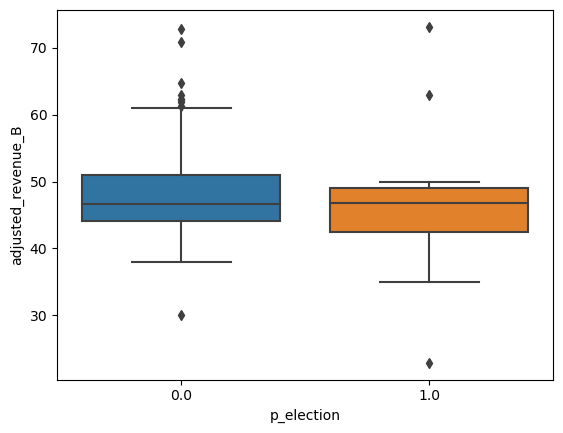

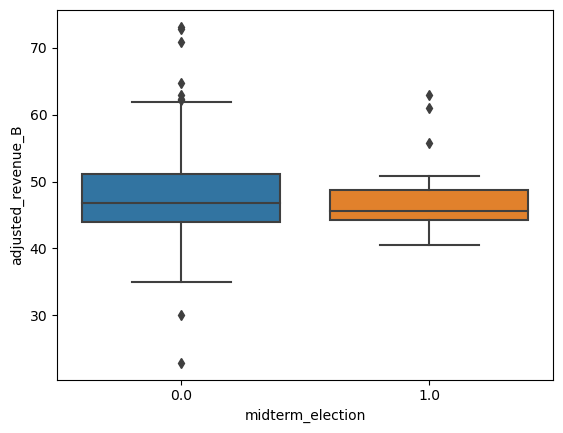

In [24]:
# Visualize election vs total_revenue_B
sns.boxplot(x=train.p_election, y=train.adjusted_revenue_B)
plt.show()
sns.boxplot(x=train.midterm_election, y=train.adjusted_revenue_B)
plt.show()

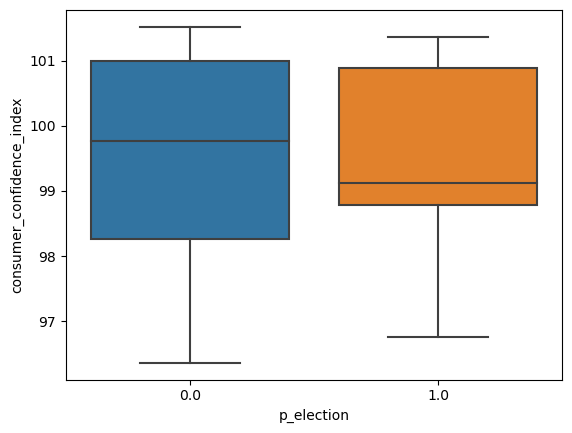

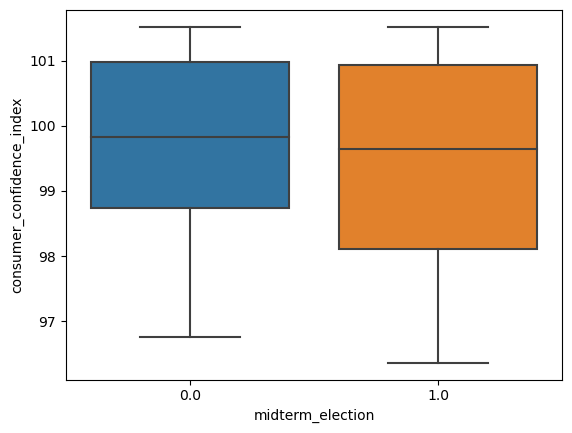

In [25]:
# Visualize election vs consumer confidence
sns.boxplot(x=train.p_election, y=train.consumer_confidence_index)
plt.show()
sns.boxplot(x=train.midterm_election, y=train.consumer_confidence_index)
plt.show()

In [ ]:
# summarize: 

In [70]:
# what about fed rate vs cost of living?

In [75]:
columns = list(train.columns)

In [81]:
columns = list(set(columns) - set(['year', 'quarter', 'total_revenue_B']))

In [86]:
import math

In [92]:
# In order to get a series of pair plots of size 4x4 that ensure every feature is compared to every other feature:
# I will break the features into groups of 2 and compare them to every other group of 2 using iter tools
# this will create 91 pairplots. That's a lot, but better than 28 choose 4, and based on some tests of smaller sets,
# I believe I've found a way to ensure all features are compared to each other.
# example: A B C D E F G H
# ABCD, ABEF, ABGH, CDEF, CDGH, EFGH
# that still has some repeats, but I'm going to press. math problem is interesting, but may take me too long for now

# this is "14 Choose 2" which is 14! / (12! * 2!)
math.factorial(14) / (math.factorial(12) * math.factorial(2))

91.0

In [93]:
import itertools as iter

In [159]:
# not what I want
combos = iter.combinations(columns, 4)
for c in combos:
    print(c)

('ppi_total_manufacturing', 'population', 'palmer_drought_index', 'avg_temperature')
('ppi_total_manufacturing', 'population', 'palmer_drought_index', 'home_ownership_rate')
('ppi_total_manufacturing', 'population', 'palmer_drought_index', 'jobs_report')
('ppi_total_manufacturing', 'population', 'palmer_drought_index', 'total_flights')
('ppi_total_manufacturing', 'population', 'palmer_drought_index', 'median_house_income')
('ppi_total_manufacturing', 'population', 'palmer_drought_index', 'corruption_perception_index')
('ppi_total_manufacturing', 'population', 'palmer_drought_index', 'case_shiller_index')
('ppi_total_manufacturing', 'population', 'palmer_drought_index', 'eci')
('ppi_total_manufacturing', 'population', 'palmer_drought_index', 'consumer_expenditure_survey')
('ppi_total_manufacturing', 'population', 'palmer_drought_index', 'cost_of_living_index')
('ppi_total_manufacturing', 'population', 'palmer_drought_index', 'p_election')
('ppi_total_manufacturing', 'population', 'palme

In [206]:
train.head()

,total_revenue_B,year,quarter,population,median_house_income,federal_fund_rate,unemp_rate,misery_index,home_ownership_rate,government_spending,gdp_deflated,p_election,midterm_election,violent_crime_rate,cpi_all_items_avg,avg_temperature,avg_precipitation,palmer_drought_index,eci,dow,s_and_p,gas_perc_change,prime,gini,Man_new_order,hdi,construction_res,cli,auto_loan,velocity_of_money,loans_and_leases,wti,soy,case_shiller_index,number_of_disaster,consumer_confidence_index,business_confidence_index,c_e_s_housing,c_e_s_health,c_e_s_entertainment,ease_of_doing_business,wars_started
1,44.00,2022.0,3.0,333.640000,78595.000000,2.56,3.5,11.71485,66.0,6063.491,128.269,0.0,1.0,405.0,296.808,68.04,1.85,-3.43,155.8,28725.51,3585.62,0.161,5.73,39.4,60604.0,0.921,900993.0,99.277920,5.52,1.165,11.8,84.400000,537.551980,893.875,283.0,96.831203,99.187750,23454.479412,5644.799617,3322.633766,7.0,5.0
24,39.15,2016.0,4.0,323.910000,66657.000000,0.12,4.7,6.75080,63.7,4178.499,106.487,1.0,0.0,397.9,241.432,32.95,2.72,-1.40,127.3,19762.60,2238.83,-0.167,3.64,41.1,53548.0,0.922,519253.0,99.671985,4.45,1.448,2.5,52.052727,375.288779,562.116,190.0,101.364367,100.709533,19884.000000,4928.000000,3203.000000,7.0,7.0
65,40.30,2006.0,3.0,298.905385,64499.527473,5.25,4.5,6.51207,69.0,2775.712,90.628,0.0,1.0,479.3,202.900,63.30,2.80,-2.87,102.5,11679.07,1335.85,-0.261,8.25,41.4,39899.0,0.900,579753.0,101.093573,7.95,2.017,7.9,64.119048,199.307015,550.945,118.0,100.733733,99.416173,16366.000000,2766.000000,2377.000000,3.0,8.0
45,33.92,2011.0,3.0,311.890000,60428.000000,0.08,9.0,12.81262,66.3,3783.833,98.595,0.0,0.0,387.1,226.889,66.09,2.48,-1.58,114.2,10913.38,1131.42,0.306,3.25,40.9,36634.0,0.911,258293.0,99.202021,5.89,1.714,12.6,85.648182,490.908955,411.781,104.0,97.488217,99.716470,16803.000000,3313.000000,2572.000000,5.0,10.0
60,43.29,2007.0,4.0,302.285879,64764.472527,4.24,5.0,9.10881,67.8,2991.765,93.327,0.0,0.0,471.8,210.036,33.22,2.97,-2.34,106.7,13264.82,1468.36,-2.007,7.33,40.8,39739.0,0.906,423699.0,101.419728,7.59,1.977,19.8,91.774762,423.080741,514.725,609.0,98.277647,99.037393,17109.000000,2976.000000,2835.000000,3.0,8.0


# Pause on clustering exploration - NOW, Feature Engineering/Selection with RFE and KMeans

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
def scaled_df(train, test):
    """
    This function scales the train, validate, and test data using the MinMaxScaler.
    Parameters:
    train (pandas DataFrame): The training data.
    validate (pandas DataFrame): The validation data.
    test (pandas DataFrame): The test data.
    Returns:
    Tuple of:
        X_train_scaled (pandas DataFrame): The scaled training data.
        X_validate_scaled (pandas DataFrame): The scaled validation data.
        X_test_scaled (pandas DataFrame): The scaled test data.
        y_train (pandas Series): The target variable for the training data.
        y_validate (pandas Series): The target variable for the validation data.
        y_test (pandas Series): The target variable for the test data.
    """
    keep_cols = ['population','median_house_income',
       'misery_index', 'government_spending',
       'gdp_deflated', 'violent_crime_rate',
       'cpi_all_items_avg','eci', 'prime',
       'gini', 'hdi', 'cli', 'velocity_of_money',
       'soy', 'consumer_confidence_index',
       'c_e_s_health', 'ease_of_doing_business']
                  
    X_train = train[keep_cols]
    X_test = test[keep_cols]
                 
    y_train = train.adjusted_revenue_B
    y_test = test.adjusted_revenue_B
    #making our scaler
    scaler = MinMaxScaler()
    #fitting our scaler
    # AND!!!!
    #using the scaler on train
    X_train_scaled = scaler.fit_transform(X_train)
    #using our scaler on test
    X_test_scaled = scaler.transform(X_test)
    # Convert the array to a DataFrame
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    # Convert the array to a DataFrame
    X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns, index=X_test.index)
    return X_train_scaled, X_test_scaled, y_train, y_test

In [32]:
# split into X and y and scale
X_train_scaled, X_test_scaled, y_train, y_test = scaled_df(train, test)

In [33]:
from sklearn.feature_selection import SelectKBest, f_regression

In [34]:
def get_kbest_multi (X_train_scaled, y_train):
    """
    This function will
    - accept X_train_scaled, a dataframe with scaled columns ready to check for which of those columns (features) 
        will be most useful to predict the values in y_train which is the target
    - return a dataframe with results of top features, iterating over k = 1 to number of columns
    """
    # Initialize col_list to capture rank-ordered columns (features)
    col_list = []
    
    # loop through checking for k best columns where k = 1 - n (number of columns)
    n = len(X_train_scaled.columns.to_list())
    for i in range(0, n):
 
        # make the thing and fit the thing
        f_selector = SelectKBest(f_regression, k=i+1)
        f_selector.fit(X_train_scaled, y_train)

        # get the mask so we know which are the k-best features
        feature_mask = f_selector.get_support()
        
        # code to add the next best feature to col_list
        for c in X_train_scaled[X_train_scaled.columns[feature_mask]].columns:
            if c not in col_list:
                col_list = col_list + [c]
    
    # make and return dataframe with results
    rank = list(range(1,len(col_list)+1))
    scores = f_selector.scores_
    scores = sorted(scores, reverse=True)
    results_df = pd.DataFrame({'Feature':col_list, 
                               'KBest_Rank': rank, 
                               'KBest_Scores': scores})
    return results_df


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [36]:
def get_rfe_multi (X_train_scaled, y_train, n_features=1):
    """
    This function will
    - accept X_train_scaled, a dataframe with scaled columns ready to check for which of those columns (features) 
        will be most useful to predict the values in y_train which is the target
    - return a dataframe with results of top features, iterating over k = 1 to number of columns
    """
 
    # initialize LinearRegression model
    lr = LinearRegression()

    # make the thing and fit the thing
    rfe = RFE(lr, n_features_to_select=n_features)
    rfe.fit(X_train_scaled, y_train)

    feature_rank = rfe.ranking_
    
    results_df = pd.DataFrame({'Feature': X_train_scaled.columns,
                                   'RFE_Rank': feature_rank})
    return results_df.sort_values('RFE_Rank')

In [37]:
# get the KBest features in rank order
kbest_df = get_kbest_multi(X_train_scaled, y_train)
kbest_df

,Feature,KBest_Rank,KBest_Scores
0,median_house_income,1,63.020502
1,population,2,49.399093
2,cpi_all_items_avg,3,41.098385
3,eci,4,39.641425
4,gdp_deflated,5,39.289797
5,hdi,6,38.784210
6,velocity_of_money,7,38.152500
7,violent_crime_rate,8,34.094890
8,government_spending,9,28.250861
9,ease_of_doing_business,10,22.827989


In [38]:
# get rfe 'n' best features, with the rest rank ordered
# note, thi
rfe_df = get_rfe_multi (X_train_scaled, y_train, n_features=1)
rfe_df

,Feature,RFE_Rank
0,population,1
4,gdp_deflated,2
14,consumer_confidence_index,3
7,eci,4
1,median_house_income,5
2,misery_index,6
10,hdi,7
12,velocity_of_money,8
8,prime,9
11,cli,10


# What if we had a different baselin:
## i.e. what if we simply predicted the current quarter for the next quarter

In [28]:
# read in non-adjusted revenue numbers
df = pd.read_csv('data/ford_starbucks_att_revenue.csv')

In [14]:
df.head(3)

,year,quarter,ford_revenue,starbucks_revenue,att_revenue
0,2023,2,NaN,NaN,NaN
1,2023,1,41.47,8.72,30.14
2,2022,4,44.00,8.71,31.34
3,2022,3,39.39,8.41,30.04
4,2022,2,40.19,8.15,29.64


In [29]:
# make new column for predictions
df['ford_predict'] = df.ford_revenue

In [16]:
df.head(3)

,year,quarter,ford_revenue,starbucks_revenue,att_revenue,ford_predict
0,2023,2,NaN,NaN,NaN,NaN
1,2023,1,41.47,8.72,30.14,41.47
2,2022,4,44.00,8.71,31.34,44.00
3,2022,3,39.39,8.41,30.04,39.39
4,2022,2,40.19,8.15,29.64,40.19


In [30]:
# shift the column up 1. this way the current quarters revenue
# becomes the prediction for next quarter
df['ford_predict'] = df.ford_predict.shift(-1)

In [31]:
# make new column for the error (difference between actual 'ford_revenue', and 'ford_predict'
df['ford_predict_error'] = (df.ford_revenue - df.ford_predict)

In [32]:
# take absolute values for the whole column so I can get an average error below
df.ford_predict_error = df.ford_predict_error.abs()

In [24]:
df.head()

,year,quarter,ford_revenue,starbucks_revenue,att_revenue,ford_predict,ford_predict_error
0,2023,2,NaN,NaN,NaN,41.47,NaN
1,2023,1,41.47,8.72,30.14,44.00,2.53
2,2022,4,44.00,8.71,31.34,39.39,4.61
3,2022,3,39.39,8.41,30.04,40.19,0.80
4,2022,2,40.19,8.15,29.64,34.48,5.71


In [25]:
df.tail(2)

,year,quarter,ford_revenue,starbucks_revenue,att_revenue,ford_predict,ford_predict_error
80,2003,2,40.58,1.04,10.24,40.82,0.24
81,2003,1,40.82,0.95,10.38,NaN,NaN


In [27]:
df.ford_predict_error.sum() / 80

3.2316249999999997

## Exploration Summary
* I looked at 5 variables and their relation to the target, total_revenue_B
    - avg_temperature 
        REJECT, no strong association, high p value
    - avg_precipitation
        CONSIDER, mild association (-.28), high p value
    - palmer_drought_index
        CONSIDER, mild association (-.32), high p value
    - number_of_disaster
        CONSIDER, mild association (.33), high p value
    - total_flights
        REJECT, no strong association, high p value

* Features that have a relationship with target (stats test for feature_y, feature_z, etc. completed on separate working notebook:
    * feature x ...
    * feature y
    * feature z


### (As Required) Features I am moving to modeling with

### (As Required) Features I am not moving to modeling with

# Modeling
* Evaluation Metrics (example: I will use R^2 and Root Mean Square Error (RMSE) as my evaluation metrics)
    * for R^2, the value is in the range 0-1; closer to 1.0 is better; baseline is 0.0
    * for RMSE, the lower the value the better; baseline is xxx
* The average target is xxx which is the baseline prediction
* I will evaluate x different model types and various hyperparameter configurations
    * (Example: The four model types are Ordinary Least Squares (OLS), LassoLars, Polynomial Regression, Generalized Linear Model (GLM))
* Models will be evaluated on train and validate data
* The model that performs the best will then be evaluated on test

In [11]:
## prep data for modeling
## INSERT CODE HERE (examples below

# scaling continuous variable columns for use in modeling
# to_scale = ['bathrooms', 'bedrooms', 'squarefeet', 'lotsize_sqft', 'year']
# train_scaled, validate_scaled, test_scaled = w.get_minmax_scaled(train, validate, test, to_scale)

# get X y splits for modeling
# X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test = m.get_X_y_baseline(train_scaled, validate_scaled, test_scaled)

## Model Name (example: Ordinary Least Squares (OLS) Regression)

In [12]:
# get model results
# INSERT CODE HERE

* model name did/did not beat baseline

## Model Name (example: LassoLars)

In [12]:
# get model results
# INSERT CODE HERE

* model name did/did not beat baseline

## Model Name (example: Polynomial Regression)

In [12]:
# get model results
# INSERT CODE HERE

* model name did/did not beat baseline

## Model Name (example: Generalized Linear Model (GLM))

In [12]:
# get model results
# INSERT CODE HERE

* model name did/did not beat baseline

## Comparing Models
* summarize the model performance
* ...
* I have chosen to move forward with the ___ model on test

## Best Model (model name) on Test

In [14]:
# get test results for final model
# INSERT CODE HERE

In [15]:
# maybe a visual of model performance (like a residual plot for a regression model)

## Modeling Summary
* summary bullet 1 ...

# Conclusions

## Exploration
* bullets

## Modeling
* bullets

## Recommendations
* bullets

## Next steps
* bullets